In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
from scipy.signal import savgol_filter
from fbprophet import Prophet

In [4]:
def getStates():
    ds = pd.read_csv('data/test.csv')
    states = ds['Province_State'][:50].values
    return states

In [5]:
def select_data(x, y, threshold):
    y_spl = UnivariateSpline(x,y,s=0,k=4)
    y_spl_2d = y_spl.derivative(n=2)
    x_reverse = np.array(list(reversed(x)))
    weight = np.array([((x + 1) / len(x_reverse)) for x in x_reverse]) / y[-1]
    smooth_2d = savgol_filter(y_spl_2d(x).reshape(-1), 13, degree)
    smooth_2d = [[x] for x in smooth_2d]
    final = smooth_2d * weight
    idx = -1
    res = []
    while(final[idx] <= threshold and abs(idx) < len(x)):
        res.append(y[idx])
        idx -= 1
    return x[-len(res):], list(reversed(res))

In [6]:
def getStateData(state_idx, feature_data):
    res = []
    while state_idx < len(feature_data):
        res.append(feature_data[state_idx])
        state_idx += 50
    return res

In [7]:
degree = 3
states = getStates()
window = 21
threshold = 0.0001
seq = 15
feature = 'Confirmed'
states2idx = {}
for i in range(len(states)):
    states2idx[states[i]] = i
states_data = {}
state = 'Alabama'

In [8]:
ds = pd.read_csv('data/train.csv')
ds = ds[ds['Province_State'] == state]
value = ds[feature].values
value = savgol_filter(value.reshape(-1), window, degree)
combine = [[value[i]] for i in range(len(value))]

y = np.array([value]).reshape(-1, 1)
x = [[i] for i in range(142)]

_, selected_data = select_data(x, y, threshold)
state_data = ds[-len(selected_data):]
df_date = state_data['Date'].to_frame()
df_y = state_data['Confirmed'].to_frame()
df = pd.concat([df_y, df_date], axis=1)
df.columns = ['y', 'ds']

In [9]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=26)
forecast = m.predict(future)

In [11]:
pred = forecast['yhat'].values

In [12]:
def getStateData(state_idx, feature_data):
    res = []
    while state_idx < len(feature_data):
        res.append(feature_data[state_idx])
        state_idx += 50
    return res

idx = states2idx[state]
real = pd.read_csv('data/test.csv')
real_confirmed = real['Confirmed'].values
real_state_data = getStateData(idx, real_confirmed)

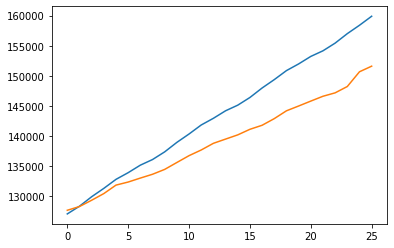

In [13]:
plt.plot(pred[-26:], label='pred')
plt.plot(real_state_data, label='real')
